# Data Visualization: Plotting with Matplotlib

## Objectives

1. Configure a Jupyter Notebook for inline visualizations with `pyplot`
2. Create `fig` and `ax` objects with `plt.subplots()`
3. Add titles and axis labels to a plot.
4. Visualize data using a scatterplot.
5. Visualize sequential data using a line plot.
6. Visualize data using a bar chart.
7. Explain why data scientists don't use pie charts.
8. Use `pd.scatter_matrix()` for rapid data exploration.

### 1. Configure Jupyter for inline visualizations with `pyplot`

In [1]:
import numpy as np
import pandas as pd
from scipy import stats
from matplotlib import pyplot as plt
%matplotlib inline

### 2. Create `fig` and `ax` objects with `plt.subplots()`

#### 2a. Creating a figure with _one_ set of axes

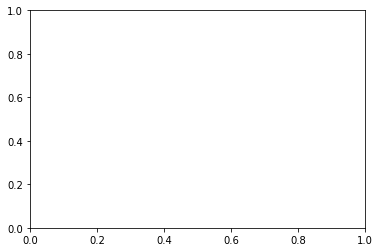

In [2]:
fig, ax = plt.subplots()
#

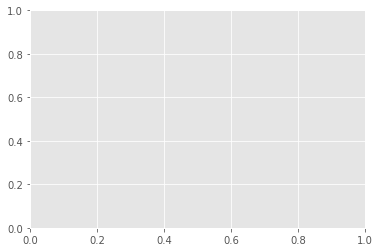

In [3]:
# Apply a style
plt.style.use('ggplot')  # ggplot is the plotting library in R
fig, ax = plt.subplots()

In [4]:
ax.scatter(0.5, 0.5)

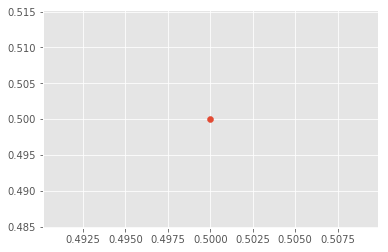

In [6]:
fig
#after plotting it auto-reset the axes step size
#we'll have to set them explicitly to avoid this

#### 2(b) Creating a figure with _multiple_ axes

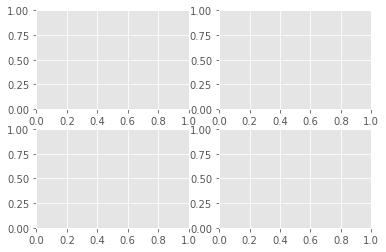

In [7]:
fig, axs = plt.subplots(2, 2) #2 x 2 array of axes
#fig is entire window
#axs are individual plots that makeup the fig

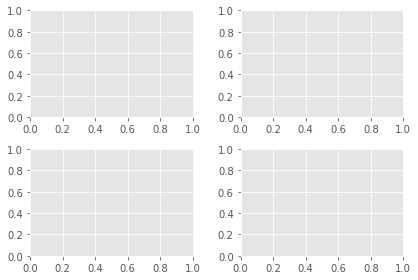

In [8]:
# Fix the ugliness
fig.tight_layout() #enable every time you have multiple axes
# contribute to matplotlib opportunity - .tight_layout docstring is wrong
fig

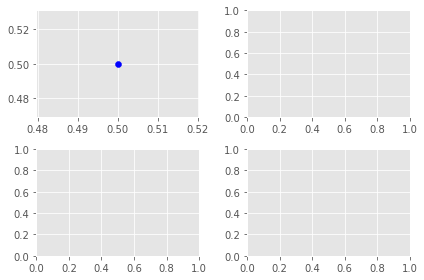

In [9]:
# Referencing one set of axes
ax = axs[0][0]
ax.scatter(0.5, 0.5, color='blue')
fig

In [10]:
# This does the same thing, for the remaining axes
axs[0][1].scatter(0.5, 0.5, color='purple') #1st row, 2nd column
axs[1][0].scatter(0.5, 0.5, color='red') #2nd row, 1st column
axs[1][1].scatter(0.5, 0.5, color='green') #2nd row, 2nd column

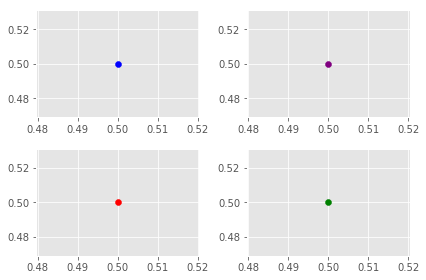

In [11]:
fig

### 3. Add titles and axis labels to a plot

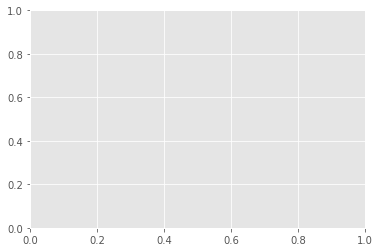

In [12]:
fig, ax = plt.subplots()

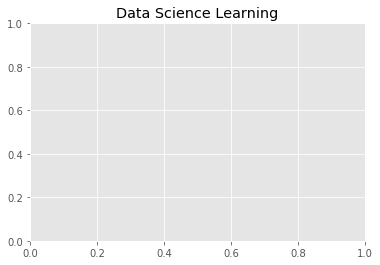

In [13]:
# Label the plot
ax.set_title('Data Science Learning')
fig

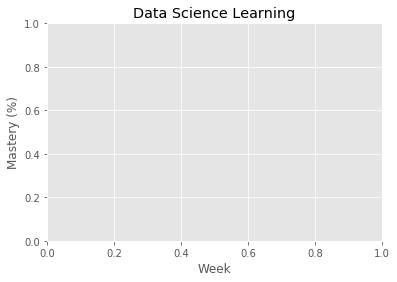

In [14]:
# Label your axes
ax.set_xlabel('Week')
ax.set_ylabel('Mastery (%)')
fig

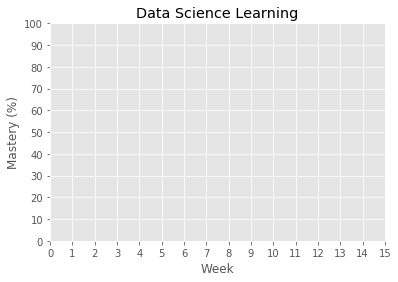

In [17]:
# Set limits aka the scale of the axes
ax.set_xlim(1, 15)
ax.set_ylim(0, 100)

# change tick frequency & range
ax.set_yticks(range(0, 101, 10))
ax.set_xticks(range(0, 16, 1))
fig



#### 4. Visualize data using a scatterplot.

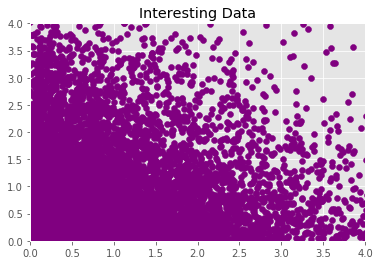

In [18]:
fig, ax = plt.subplots()

# Label plot
ax.set_title('Interesting Data')

# Set limits
ax.set_xlim(0, 4)
ax.set_ylim(0, 4)

# Generate data
exponential_distribution = stats.expon()
x = exponential_distribution.rvs(10000)
y = exponential_distribution.rvs(10000)

# Plot
ax.scatter(x, y, color="purple")

##### What's wrong with the plot above? How is it fixed below?

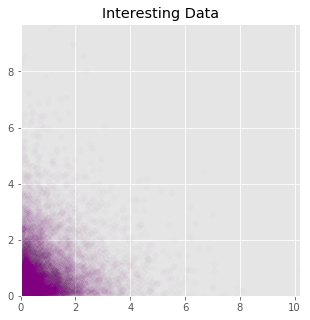

In [23]:
#BAD PLOT:
# data too crowded
# data outside bounds of graph
# no names on axes
# scale is different on each axis


# Set figure size
fig, ax = plt.subplots(figsize=(5, 5))

# Label plot
ax.set_title('Interesting Data')

# Generate data
exponential_distribution = stats.expon() #using scipy.stats to get an exponential distribution
normal_distribution = stats.norm() #could use stats.norm() to get a normal distribution
x = exponential_distribution.rvs(10000)
y = exponential_distribution.rvs(10000)

# Set limits
ax.set_xlim(x.min(), x.max()) #sometimes we want actual numbers input instead of max/min, 
#esp. if there are extreme outliers
ax.set_ylim(y.min(), y.max())

# Plot with alpha transparency
ax.scatter(x, y, alpha=.01, color="purple") #alpha makes it more transparent

#### 5. Visualize sequential data using a line plot.

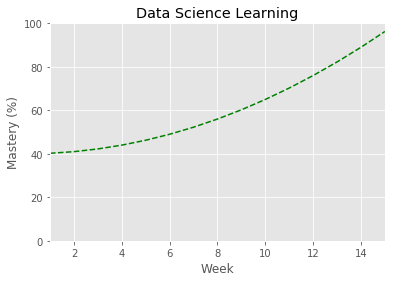

In [24]:
fig, ax = plt.subplots()

# Label plot
ax.set_title('Data Science Learning')

# Label axes
ax.set_xlabel('Week')
ax.set_ylabel('Mastery (%)')

# Set limits
ax.set_xlim(1, 15)
ax.set_ylim(0, 100)

x = np.arange(0, 16)
y = 40 + x**2/4

ax.plot(x, y, linestyle="dashed", color="green")

#### 6. Visualize data using a bar chart.

In [26]:
#one bar charts axis has to be discrete or categorical to make any sense, 
#whereas line/scatter plots use continuous numerical data
arrests = pd.read_csv('Inmate_Arrests.csv')
arrests

#PULLING STRAIGHT FROM URL
#you can use a http://***/***/***.csv URL in the pd.read_csv() method, 
#but downloading locally is more secure with static data because it avoids the chance
#of the URL being taken down

,Fiscal Year,Number of Arrests
0,2010,526
1,2009,567
2,2008,751
3,2007,738
4,2006,654
5,2005,684
6,2004,628
7,2003,671
8,2002,576
9,2001,853


<BarContainer object of 10 artists>

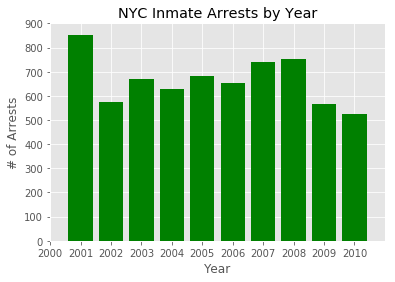

In [37]:
fig, ax = plt.subplots()

# Label plot
ax.set_title('NYC Inmate Arrests by Year')

# Label axes
ax.set_xlabel('Year')
ax.set_ylabel('# of Arrests')
ax.set_xticks(range(2000, 2011, 1))

# Set limits
ax.set_xlim(2000, 2011)
ax.set_ylim(0, 900)

x = arrests['Fiscal Year']
y = arrests['Number of Arrests']

ax.bar(x, y, color="green")

#### 7. Explain why data scientists don't use pie charts.

Pie charts make it really tough to compare scale because one has to eyeball the angle in degrees, and smaller differences are not as noticeable. There is rarely enough space to label each piece properly (especially the small ones), and there isn't any intuitive way to grasp the ordering of categories (left to right is way easier to grasp than clockwise). A bar chart is an easier alternative to compare quantities, and the y-axis can be set as % units if it's necessary to observe data points as a percent of totals. Each additional chart complication should communicate something meaningful, so you may want to hold off on the use of color in order to use color to specifically signal another feature layer. Pie charts use color & slices, but they both indicate a single thing - a new category.

#### 8. Use `pd.scatter_matrix()` for rapid data exploration.

In [38]:
cereals_df = pd.read_csv('cereal.csv')
cereals_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 77 entries, 0 to 76
Data columns (total 16 columns):
name        77 non-null object
mfr         77 non-null object
type        77 non-null object
calories    77 non-null int64
protein     77 non-null int64
fat         77 non-null int64
sodium      77 non-null int64
fiber       77 non-null float64
carbo       77 non-null float64
sugars      77 non-null int64
potass      77 non-null int64
vitamins    77 non-null int64
shelf       77 non-null int64
weight      77 non-null float64
cups        77 non-null float64
rating      77 non-null float64
dtypes: float64(5), int64(8), object(3)
memory usage: 9.7+ KB


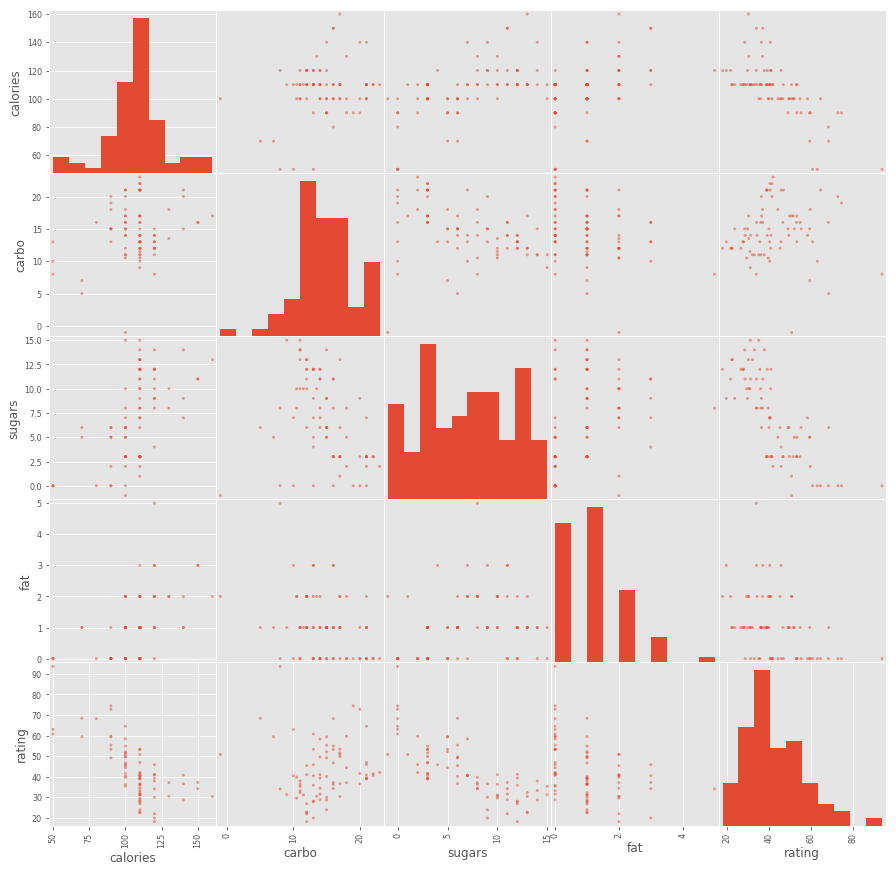

In [44]:
pd.plotting.scatter_matrix(cereals_df[['calories', 'carbo', 'sugars', 'fat', 'rating']], figsize=(15,15));
                           